In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
from skimage import color, io
image = color.rgb2gray(io.imread('kratos.jpg'))

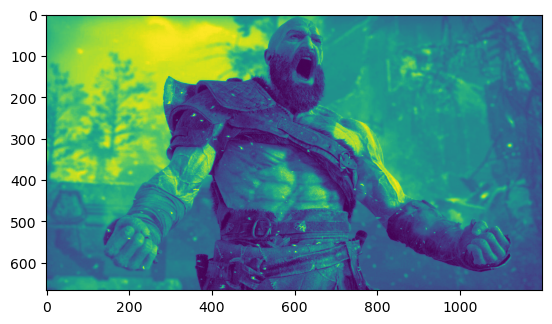

In [6]:
plt.imshow(image)

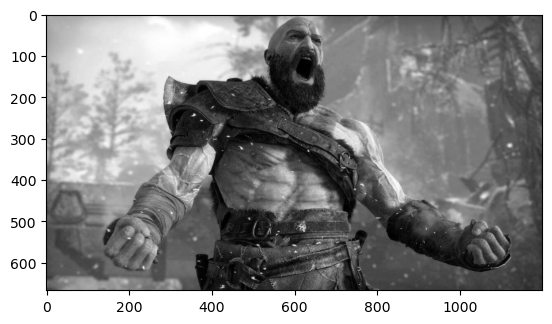

In [8]:
plt.imshow(image,cmap='gray')

In [9]:
imgFT = np.fft(image)

TypeError: 'module' object is not callable

In [34]:

imgFT = np.fft.fft2(image)
imgFT_copy = imgFT

In [17]:
fx = np.fft.fftfreq(image.shape[1],d=10)
fy = np.fft.fftfreq(image.shape[0],d=10)

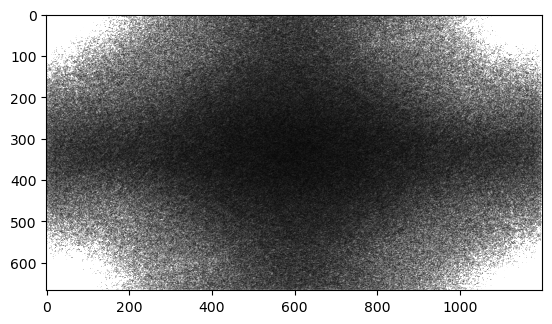

In [21]:
plt.imshow(np.abs(imgFT),cmap='gray',vmax=60)

In [23]:
#it seems f>=80 mostly
imgFT[-80:]=0
imgFT[:80]=0
imgFT[:,:80]=0
imgFT[:,-80:]=0

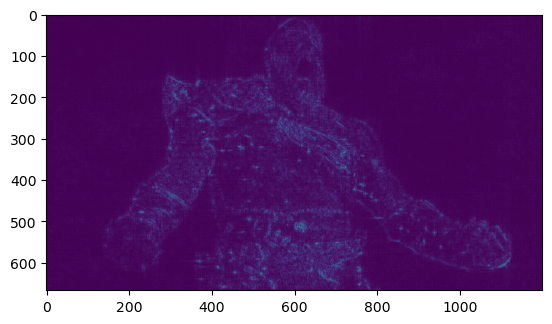

In [27]:
plt.imshow(np.abs(np.fft.ifft2(imgFT)))#that shit looks cold no cap

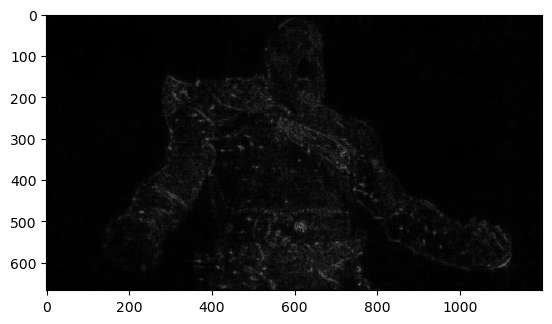

In [28]:
plt.imshow(np.abs(np.fft.ifft2(imgFT)),cmap='gray')

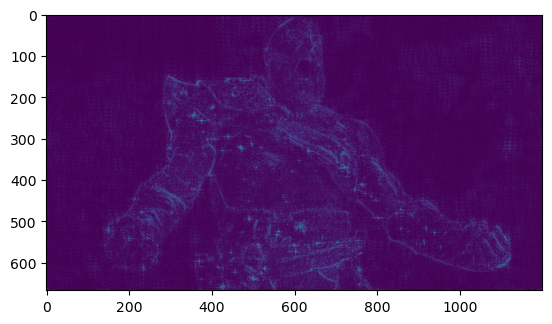

In [35]:
imgFT_copy[-30:]=0
imgFT_copy[:30]=0
imgFT_copy[:,:30]=0
imgFT_copy[:,-30:]=0
plt.imshow(np.abs(np.fft.ifft2(imgFT_copy)))#trying more freqs

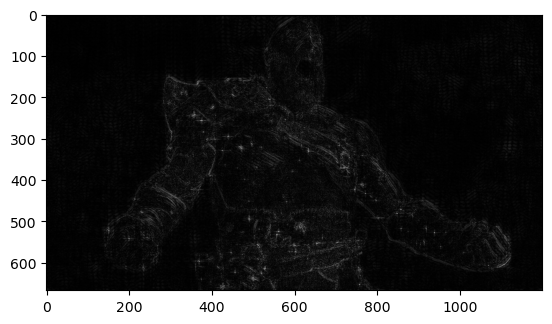

In [36]:
plt.imshow(np.abs(np.fft.ifft2(imgFT_copy)),cmap='gray')

# K so we cut kratos out (nice)

# Ok so it turns out gaussian blur is done by convolution of gaussian kernel with an original image but i learned in class today that convolved signals maybe written as:
$$x(t)*y(t) = \mathcal{F}^{-1}(\mathcal{F}(x)\mathcal{F}(y))$$

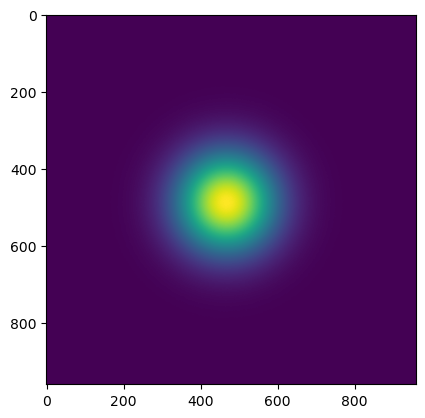

In [45]:
imagelol = color.rgb2gray(io.imread('blur.png'))
plt.imshow(imagelol)

I made the above 'gaussian kernel' in Adobe Photoshop (just used a zero hardness brush)

In [43]:
FT_img1 = np.fft.fft2(image)

In [46]:
FT_kernel = np.fft.fft2(imagelol)

In [48]:
Ft_final = FT_img1*FT_kernel

ValueError: operands could not be broadcast together with shapes (667,1200) (960,960) 

In [49]:
# ok so my filter is the wrong dimension seems like a quick fix with PS

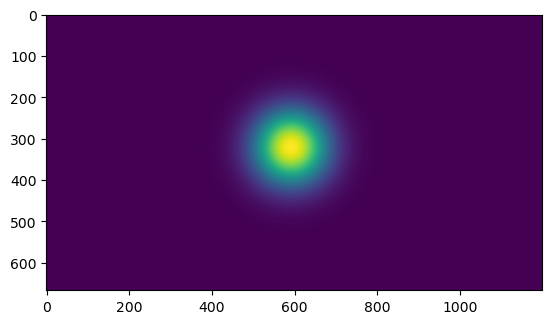

In [50]:
imagelol = color.rgb2gray(io.imread('blur.png'))
plt.imshow(imagelol)

In [51]:
FT_kernel = np.fft.fft2(imagelol)

In [52]:
Ft_final = FT_img1*FT_kernel

In [53]:
new_img = np.fft.ifft2(Ft_final)

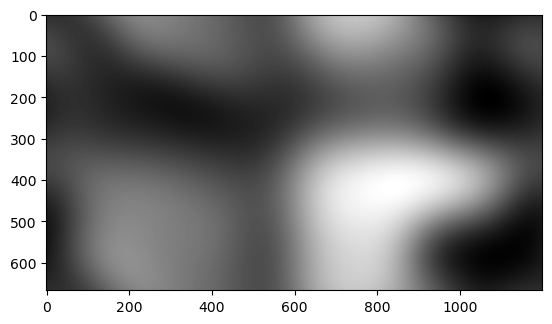

In [55]:
plt.imshow(np.abs(new_img),cmap='gray')

In [56]:
#ok so it got extremely blurry let's try a smaller filter

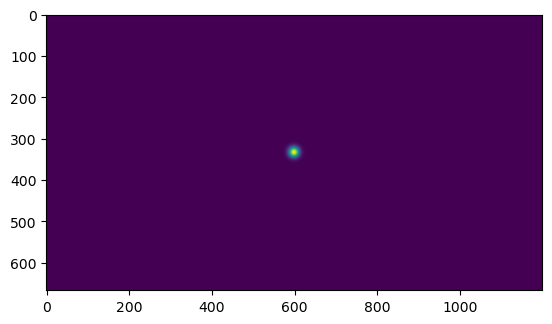

In [60]:
imagelol = color.rgb2gray(io.imread('Ublur2.png'))
plt.imshow(imagelol)

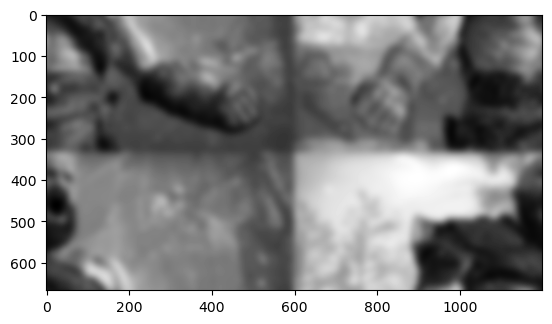

In [70]:
FT_kernel = np.fft.fft2(imagelol)
Ft_final = FT_img1*FT_kernel
new_img = np.fft.ifft2(Ft_final)
plt.imshow(np.real(new_img),cmap='gray')

In [71]:
#ok so some dimentional problems (don't know why but i'll manually fix it real quick)

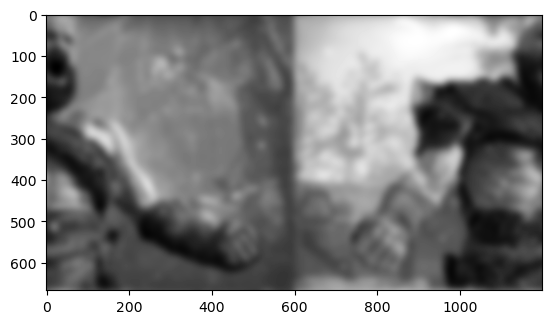

In [77]:
from PIL import Image
image_array = np.real(new_img)

height, width = image_array.shape

midpoint = height // 2
upper_part = image_array[:midpoint, :]
lower_part = image_array[midpoint:, :]
result_image = np.vstack((lower_part, upper_part))
plt.imshow(result_image,cmap='gray')

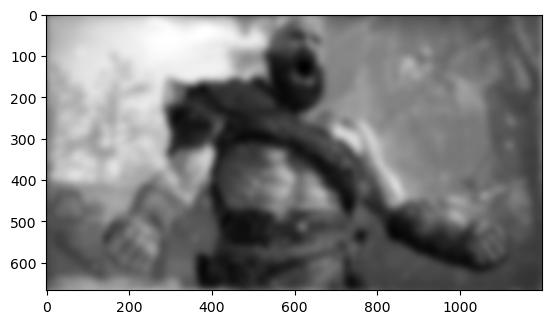

In [78]:
image_array = result_image
height, width = image_array.shape

# Calculate the midpoint of the image
midpoint = width // 2
left_half = image_array[:, :midpoint]
right_half = image_array[:, midpoint:]
result_image = np.hstack((right_half, left_half))
plt.imshow(result_image,cmap='gray')

In [ ]:
And we are done it took some time lol but effectively i was able to convolve a gaussian kernel with an image of kratos and 
hence was able to blur it... i have used Conv2D function in the keras library but had no idea it performs convolution using 
the Fast Fourier Transform.